In [1]:
import scanpy as sc
import anndata as ad
import squidpy as sq
import os

import numpy as np
import pandas as pd

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

scanpy==1.8.2 anndata==0.8.0 umap==0.5.0 numpy==1.21.6 scipy==1.10.0 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.10.8 louvain==0.7.1 pynndescent==0.5.1
squidpy==1.2.0


In [2]:
sc.settings.set_figure_params(dpi=150)
import skimage.io as io

In [3]:
path_to_visium = '/lustre/scratch126/cellgen/team292/vl6/VISIUM/'

In [4]:
# Add metadata 
meta_dict = {'sample' : ['HCA_F_RepTsp13147665', 'HCA_F_RepTsp13147666', 'HCA_F_RepTsp13173760', 'HCA_F_RepTsp13173761', 
                       'HCA_F_RepTsp13173762', 'HCA_F_RepTsp13173763', 'HCA_F_RepTsp13219892', 'HCA_F_RepTsp13219893', 
                        'HCA_F_RepTsp13219894', 'HCA_F_RepTsp13219895', 'HCA_F_RepTsp13447718', 'HCA_F_RepTsp13447719',
                        'HCA_F_RepTsp13447720', 'HCA_F_RepTsp13447721',  'HCA_F_RepTsp13902013', 'HCA_F_RepTsp13902014', 'HCA_F_RepTsp13902015', 
                        'HCA_F_RepTsp13902016', 'HCA_F_RepTsp13902018', 'HCA_F_RepTsp13902017', 
                        'HCA_F_RepTsp13902019', 'HCA_F_RepTsp13902020'],
            'sangerID' : ['Hrv58-GON-0-FO-1-s84', 'Hrv58-GON-0-FO-1-s80', 'HRV183-RPT-0-FO-1-S14_and_HRV183-RPT-0-FO-1-S12', 
                         'HRV183-RPT-0-FO-1-S9', 'HRV162-RPT-0-FO-1-S176_and_HRV183-RPT-0-FO-1-S26', 'HRV162-RPT-0-FO-1-S161_and_HRV162-RPT-0-FO-1-S162', 
                         'Hrv117-GON-0-FO-1-S109', 'HRV184-RPT-0-FO-2-S34_and_HRV184-RPT-0-FO-2-S31_and_Hrv117-GON-0-FO-1-S116', 
                         'HRV129-GON-0-FO-1-S42', 'HRV184-RPT-0-FO-1-S26', 'Hrv125-GON-0-FO-5-S65-A1', 
                         'Hrv125-GON-0-FO-5-S66-B1', 'Hrv125-GON-0-FO-5-S18-C1', 'Hrv125-GON-0-FO-5-S17-D1', 'Hrv238-RPT-0-FO-1-S39', 'Hrv238-RPT-0-FO-1-S24',
                          'Hrv214-RPT-0-FO-1-S58', 'Hrv214-RPT-0-FO-1-S57', 'Hrv245-RPT-9-FO-1-S13', 
                         'A70-RPT-9-FO-1-S39', 'A70-RPT-9-FO-1-S40', 'A70-RPT-9-FO-1-S41'],
            'slide' : ['V12F14-072', 'V12F14-072', 'V12F14-073', 'V12F14-073', 'V12F14-073', 'V12F14-073', 
                      'V12F14-077', 'V12F14-077', 'V12F14-077', 'V12F14-077', 'V12Y31-055', 'V12Y31-055', 
                      'V12Y31-055', 'V12Y31-055', 'V42L11-100', 'V42L11-100', 'V42L18-060', 'V42L18-060', 
                      'V42L13-373', 'V42L13-373', 'V43J19-097', 'V43J19-097'], 
            'position' : ['A1', 'D1', 'A1', 'B1', 'C1', 'D1', 'A1', 'B1', 'C1', 'D1', 'A1', 'B1', 'C1', 'D1', 
                         'A1', 'D1', 'A1', 'D1', 'A1', 'D1', 'A1', 'D1'], 
#            'image_name' : ['V12F14-072_A1.tif', 'V12F14-072_D1.tif', 'V12F14-073_A1.tif', 'V12F14-073_B1.tif', 'V12F14-073_C1.tif', 'V12F14-073_D1.tif', 
#                           'V12F14-077_A1.tif', 'V12F14-077_B1.tif', 'V12F14-077_C1.tif', 'V12F14-077_D1.tif', 'V12Y31-055_A1.tiff',
#                           'V12Y31-055_B1.tiff', 'V12Y31-055_C1.tiff', 'V12Y31-055_D1.tiff'], 
            'donor' : ['Hrv58', 'Hrv58',  'Hrv183', 'Hrv183', 'Hrv162_and_Hrv183', 'Hrv162', 'Hrv117', 'Hrv184_and_Hrv117', 'Hrv129', 'Hrv184',
                      'Hrv125', 'Hrv125', 'Hrv125', 'Hrv125', 'Hrv238', 'Hrv238', 'Hrv214', 'Hrv214', 'Hrv245', 
                      'A70', 'A70', 'A70'], 
            'stage(pcw)' : ['18', '18', '15', '15', '15_and_21', '21', '20', '15_and_20', '17', '15', 
                           '21','21','21','21', '17', '17', '15', '15', '15', '37YO', '37YO', '37YO'], 
            'sex' : ['female', 'female', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'male',
                    'female', 'female', 'female', 'female',  'female', 'female', 'female', 'female', 'female', 
                    'female', 'female', 'female'], 
           'sectioning' : ['coronal', 'coronal', 'coronal', 'coronal', 'coronal_and_transverse', 'transverse', 'transverse', 'transverse_and_coronal', 
                          'transverse', 'transverse', 'coronal', 'coronal', 'sagittal', 'sagittal', 
                          'coronal', 
                          'coronal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal', 'sagittal'], 
            'permeabilisation(min)' : [30, 30, 30, 30, 30, 30, 30, 30, 30, 30,  30, 30, 30, 30, 30, 30, 30, 30, 30,
                                      30, 30, 30],
           'month_processing' : ['august', 'august', 'september', 'september', 'september', 'september', 'october', 'october', 'october', 'october', 
                                'january', 'january','january','january', 'july', 'july', 'july', 'july', 'july',
                                'july', 'july', 'july' ], 
           'spaceranger' : ['2.0.0', '2.0.0', '2.0.0', '2.0.0', '2.0.0', '2.0.0', '2.0.0', '2.0.0', 
                            '2.0.0', '2.0.0', '2.0.0', '2.0.0', '2.0.0', '2.0.0', '2.1.0', '2.1.0', '2.1.0', '2.1.0', 
                           '2.1.0', '2.1.0', '2.1.0', 
                           '2.1.0']}


meta = pd.DataFrame.from_dict(meta_dict)
meta = meta.set_index('sample')
meta


sangerID  \
sample                                                                    
HCA_F_RepTsp13147665                               Hrv58-GON-0-FO-1-s84   
HCA_F_RepTsp13147666                               Hrv58-GON-0-FO-1-s80   
HCA_F_RepTsp13173760    HRV183-RPT-0-FO-1-S14_and_HRV183-RPT-0-FO-1-S12   
HCA_F_RepTsp13173761                               HRV183-RPT-0-FO-1-S9   
HCA_F_RepTsp13173762   HRV162-RPT-0-FO-1-S176_and_HRV183-RPT-0-FO-1-S26   
HCA_F_RepTsp13173763  HRV162-RPT-0-FO-1-S161_and_HRV162-RPT-0-FO-1-S162   
HCA_F_RepTsp13219892                             Hrv117-GON-0-FO-1-S109   
HCA_F_RepTsp13219893  HRV184-RPT-0-FO-2-S34_and_HRV184-RPT-0-FO-2-S3...   
HCA_F_RepTsp13219894                              HRV129-GON-0-FO-1-S42   
HCA_F_RepTsp13219895                              HRV184-RPT-0-FO-1-S26   
HCA_F_RepTsp13447718                           Hrv125-GON-0-FO-5-S65-A1   
HCA_F_RepTsp13447719                           Hrv125-GON-0-FO-5-S66-B1   
HCA_F_RepTsp13447720                           Hrv125-GON-0-FO-5-S18-C1   
HCA_F_RepTsp13447721                           Hrv125-GON-0-FO-5-S17-D1   
HCA_F_RepTsp13902013                              Hrv238-RPT-0-FO-1-S39   
HCA_F_RepTsp13902014                              Hrv238-RPT-0-FO-1-S24   
HCA_F_RepTsp13902015                              Hrv214-RPT-0-FO-1-S58   
HCA_F_RepTsp13902016                              Hrv214-RPT-0-FO-1-S57   
HCA_F_RepTsp13902018                              Hrv245-RPT-9-FO-1-S13   
HCA_F_RepTsp13902017                                 A70-RPT-9-FO-1-S39   
HCA_F_RepTsp13902019                                 A70-RPT-9-FO-1-S40   
HCA_F_RepTsp13902020                                 A70-RPT-9-FO-1-S41   

                           slide position              donor stage(pcw)  \
sample                                                                    
HCA_F_RepTsp13147665  V12F14-072       A1              Hrv58         18   
HCA_F_RepTsp13147666  V12F14-072       D1              Hrv58         18   
HCA_F_RepTsp13173760  V12F14-073       A1             Hrv183         15   
HCA_F_RepTsp13173761  V12F14-073       B1             Hrv183         15   
HCA_F_RepTsp13173762  V12F14-073       C1  Hrv162_and_Hrv183  15_and_21   
HCA_F_RepTsp13173763  V12F14-073       D1             Hrv162         21   
HCA_F_RepTsp13219892  V12F14-077       A1             Hrv117         20   
HCA_F_RepTsp13219893  V12F14-077       B1  Hrv184_and_Hrv117  15_and_20   
HCA_F_RepTsp13219894  V12F14-077       C1             Hrv129         17   
HCA_F_RepTsp13219895  V12F14-077       D1             Hrv184         15   
HCA_F_RepTsp13447718  V12Y31-055       A1             Hrv125         21   
HCA_F_RepTsp13447719  V12Y31-055       B1             Hrv125         21   
HCA_F_RepTsp13447720  V12Y31-055       C1             Hrv125         21   
HCA_F_RepTsp13447721  V12Y31-055       D1             Hrv125         21   
HCA_F_RepTsp13902013  V42L11-100       A1             Hrv238         17   
HCA_F_RepTsp13902014  V42L11-100       D1             Hrv238         17   
HCA_F_RepTsp13902015  V42L18-060       A1             Hrv214         15   
HCA_F_RepTsp13902016  V42L18-060       D1             Hrv214         15   
HCA_F_RepTsp13902018  V42L13-373       A1             Hrv245         15   
HCA_F_RepTsp13902017  V42L13-373       D1                A70       37YO   
HCA_F_RepTsp13902019  V43J19-097       A1                A70       37YO   
HCA_F_RepTsp13902020  V43J19-097       D1                A70       37YO   

                         sex              sectioning  permeabilisation(min)  \
sample                                                                        
HCA_F_RepTsp13147665  female                 coronal                     30   
HCA_F_RepTsp13147666  female                 coronal                     30   
HCA_F_RepTsp13173760  female                 coronal                     30   
HCA_F_RepTsp13173761  female                 coronal              

In [5]:
meta = pd.DataFrame.from_dict(meta_dict)
meta = meta.set_index('sample')
meta.head()

sangerID  \
sample                                                                   
HCA_F_RepTsp13147665                              Hrv58-GON-0-FO-1-s84   
HCA_F_RepTsp13147666                              Hrv58-GON-0-FO-1-s80   
HCA_F_RepTsp13173760   HRV183-RPT-0-FO-1-S14_and_HRV183-RPT-0-FO-1-S12   
HCA_F_RepTsp13173761                              HRV183-RPT-0-FO-1-S9   
HCA_F_RepTsp13173762  HRV162-RPT-0-FO-1-S176_and_HRV183-RPT-0-FO-1-S26   

                           slide position              donor stage(pcw)  \
sample                                                                    
HCA_F_RepTsp13147665  V12F14-072       A1              Hrv58         18   
HCA_F_RepTsp13147666  V12F14-072       D1              Hrv58         18   
HCA_F_RepTsp13173760  V12F14-073       A1             Hrv183         15   
HCA_F_RepTsp13173761  V12F14-073       B1             Hrv183         15   
HCA_F_RepTsp13173762  V12F14-073       C1  Hrv162_and_Hrv183  15_and_21   

                         sex              sectioning  permeabilisation(min)  \
sample                                                                        
HCA_F_RepTsp13147665  female                 coronal                     30   
HCA_F_RepTsp13147666  female                 coronal                     30   
HCA_F_RepTsp13173760  female                 coronal                     30   
HCA_F_RepTsp13173761  female                 coronal                     30   
HCA_F_RepTsp13173762  female  coronal_and_transverse                     30   

                     month_processing spaceranger  
sample                                             
HCA_F_RepTsp13147665           august       2.0.0  
HCA_F_RepTsp13147666           august       2.0.0  
HCA_F_RepTsp13173760        september       2.0.0  
HCA_F_RepTsp13173761        september       2.0.0  
HCA_F_RepTsp13173762        september       2.0.0

In [6]:
import anndata

In [ ]:
samples =  ['HCA_F_RepTsp13902017', 'HCA_F_RepTsp13902019', 'HCA_F_RepTsp13902020']
holder = []
for s in samples: 
    adata = sc.read(path_to_visium + s + '/' + s + '_annotated.h5ad')
    adata.var_names_make_unique()
    # Select only spots corresponding to tissue
    adata.obs['sample'] = s
    adata.obs["sample"] = [str(i) for i in adata.obs['sample']]
    adata.obs_names = adata.obs["sample"] \
                          + '_' + adata.obs_names
    adata = adata[[i == 1.0 for i in adata.obs['in_tissue']]]
    print(adata.shape)
    holder.append(adata)

In [8]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=150, frameon=True, vector_friendly=True, fontsize=14, 
                     figsize=[6,6], color_map=None, format='pdf', facecolor=None, transparent=False)

In [9]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

/opt/conda/envs/atac_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


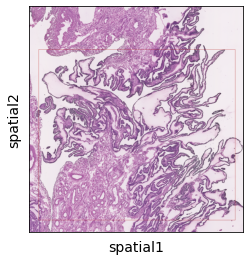

In [10]:
sc.pl.spatial(holder[0],
             save = '_fimbria_h&e')

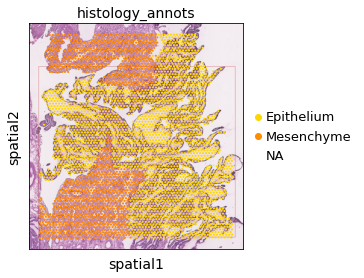

In [11]:
sc.pl.spatial(holder[0], color="histology_annots", palette = ['gold', 'darkorange'], 
             save = '_fimbria_hist')


In [12]:
holder[0].raw = holder[0].copy()
sc.pp.normalize_total(holder[0], inplace=True)
sc.pp.log1p(holder[0])

In [ ]:
sc.pl.spatial(holder[0], color=['EDN2', 'CRB2','CLDN6', 'ERP27', 'PNOC',  'PPP2R2B', 'MMP28','RSPO1', 'IMPG2', 
       'APOA1', 'SLC26A7','SLITRK2','RASGEF1B', 'NUAK2', 'SERPINI2', 'ZBED2', 'RBP4',
      'EYA4', 'DOK5', 'ASS1',   'ROS1', 'CRTAC1','TMEM132B', 'S100A1', 'LYPD1','RUNX2', 'CLDN10',
      'SPDEF', 'GMNC', 'KCNN4', 'MLPH', 'WDR72',  'LAMA1',
       'MUC6', ], cmap = 'jet', use_raw = False, # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.7', size = 1.2, ncols = 3)

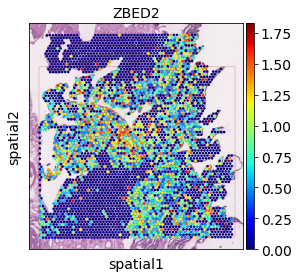

In [18]:
sc.pl.spatial(holder[0], color=["ZBED2"], cmap = 'jet', use_raw = False, # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.7', size = 1.2,
             save = '_fimbria_ZBED2')

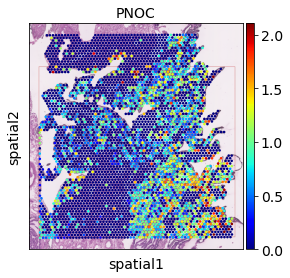

In [15]:
sc.pl.spatial(holder[0], color="PNOC", cmap = 'jet', use_raw = False, 
              vmin=0, vmax='p99.7', size = 1.2,
             save = '_fimbria_PNOC')

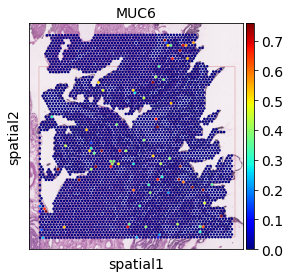

In [16]:
sc.pl.spatial(holder[0], color="MUC6", cmap = 'jet', use_raw = False, 
              vmin=0, vmax='p99.7', size = 1.2,
             save = '_fimbria_MUC6')

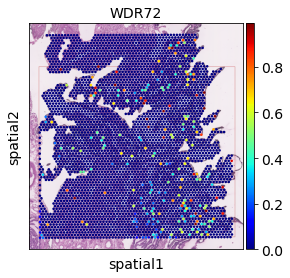

In [17]:
sc.pl.spatial(holder[0], color=["WDR72"], cmap = 'jet', use_raw = False, # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.7', size = 1.2,
             save = '_fimbria_WDR72')

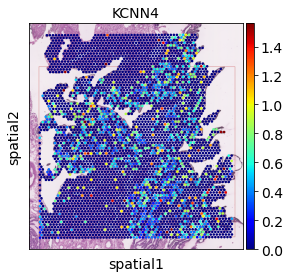

In [19]:
sc.pl.spatial(holder[0], color=["KCNN4"], cmap = 'jet', use_raw = False, # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.7', size = 1.2,
             save = '_fimbria_KCNN4')

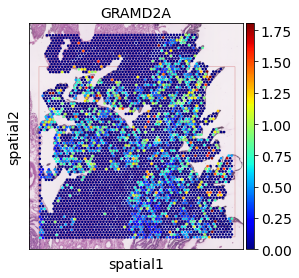

In [18]:
sc.pl.spatial(holder[0], color=["GRAMD2A"], cmap = 'jet', use_raw = False, # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.7', size = 1.2,
             save = '_fimbria_GRAMD2A')

In [20]:
holder[1].raw = holder[1].copy()
sc.pp.normalize_total(holder[1], inplace=True)
sc.pp.log1p(holder[1])

In [ ]:
sc.pl.spatial(holder[1], color=['EDN2', 'CRB2','CLDN6', 'ERP27', 'PNOC',  'PPP2R2B', 'MMP28','RSPO1', 'IMPG2', 
       'APOA1', 'SLC26A7','SLITRK2','RASGEF1B', 'NUAK2', 'SERPINI2', 'ZBED2', 'RBP4',
      'EYA4', 'DOK5', 'ASS1',   'ROS1', 'CRTAC1','TMEM132B', 'S100A1', 'LYPD1','RUNX2', 'CLDN10',
      'SPDEF', 'GMNC', 'KCNN4', 'MLPH', 'WDR72',  'LAMA1',
       'MUC6', ], cmap = 'jet', use_raw = False, # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.7', size = 1.2)

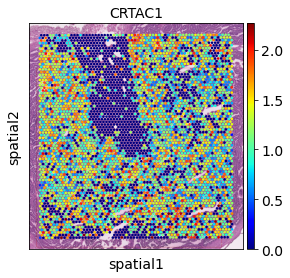

In [20]:
sc.pl.spatial(holder[1], color="CRTAC1", cmap = 'jet', use_raw = False,
              vmin=0, vmax='p99.7', size = 1.2,
             save = '_ampulla_CRTAC1')

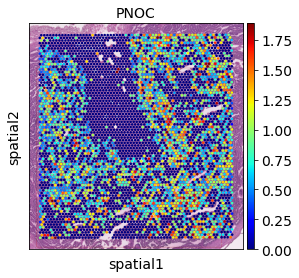

In [21]:
sc.pl.spatial(holder[1], color="PNOC", cmap = 'jet', use_raw = False, 
              vmin=0, vmax='p99.7', size = 1.2,
             save = '_ampulla_PNOC')

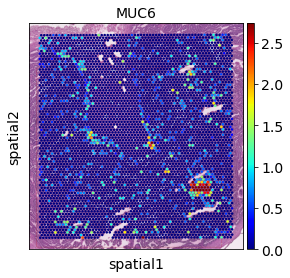

In [22]:
sc.pl.spatial(holder[1], color="MUC6", cmap = 'jet', use_raw = False, 
              vmin=0, vmax='p99.7', size = 1.2,
             save = '_ampulla_MUC6')

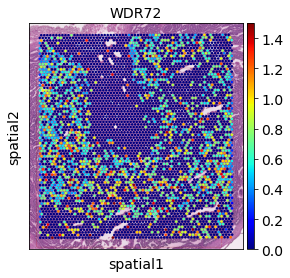

In [23]:
sc.pl.spatial(holder[1], color=["WDR72"], cmap = 'jet', use_raw = False, # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.7', size = 1.2,
             save = '_ampulla_WDR72')

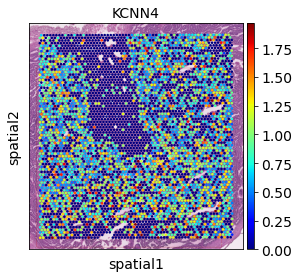

In [24]:
sc.pl.spatial(holder[1], color=["KCNN4"], cmap = 'jet', use_raw = False, # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.7', size = 1.2,
             save = '_ampulla_KCNN4')

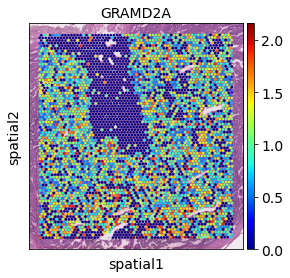

In [25]:
sc.pl.spatial(holder[1], color=["GRAMD2A"], cmap = 'jet', use_raw = False, # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.7', size = 1.2,
             save = '_ampulla_GRAMD2A')

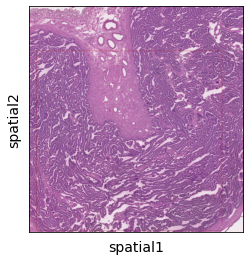

In [26]:
sc.pl.spatial(holder[1],
             save = '_ampulla_h&e')

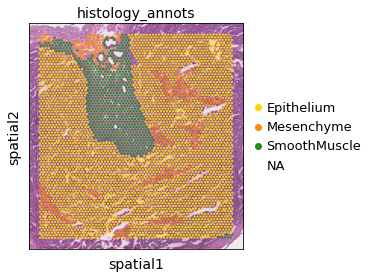

In [27]:
sc.pl.spatial(holder[1], color="histology_annots", palette = ['gold', 'darkorange', 'forestgreen'], 
             save = '_ampulla_hist')

In [22]:
holder[2].raw = holder[2].copy()
sc.pp.normalize_total(holder[2], inplace=True)
sc.pp.log1p(holder[2])

In [ ]:
sc.pl.spatial(holder[2], color=['EDN2', 'CRB2','CLDN6', 'ERP27', 'PNOC',  'PPP2R2B', 'MMP28','RSPO1', 'IMPG2', 
       'APOA1', 'SLC26A7','SLITRK2','RASGEF1B', 'NUAK2', 'SERPINI2', 'ZBED2', 'RBP4',
      'EYA4', 'DOK5', 'ASS1',   'ROS1', 'CRTAC1','TMEM132B', 'S100A1', 'LYPD1','RUNX2', 'CLDN10',
      'SPDEF', 'GMNC', 'KCNN4', 'MLPH', 'WDR72',  'LAMA1',
       'MUC6', ], cmap = 'jet', use_raw = False, # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.7', size = 1.2)

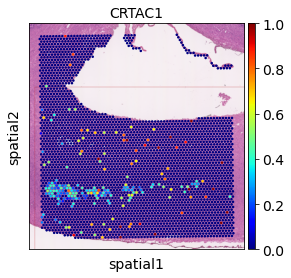

In [29]:
sc.pl.spatial(holder[2], color="CRTAC1", cmap = 'jet', use_raw = False, 
              vmin=0, vmax='p99.7', size = 1.2,
             save = '_isthmus_CRTAC1')

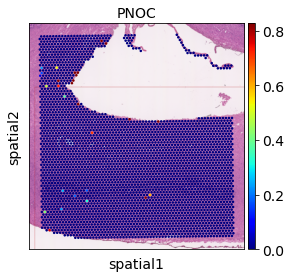

In [30]:
sc.pl.spatial(holder[2], color="PNOC", cmap = 'jet', use_raw = False, 
              vmin=0, vmax='p99.7', size = 1.2,
             save = '_isthmus_PNOC')

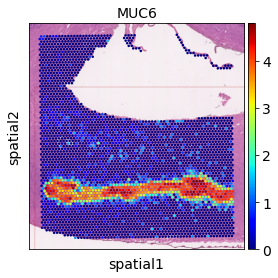

In [31]:
sc.pl.spatial(holder[2], color="MUC6", cmap = 'jet', use_raw = False, 
              vmin=0, vmax='p99.7', size = 1.2,
             save = '_isthmus_MUC6')

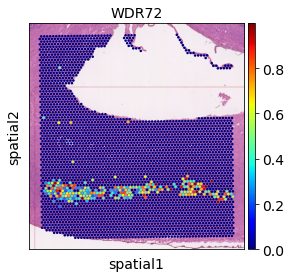

In [32]:
sc.pl.spatial(holder[2], color=["WDR72"], cmap = 'jet', use_raw = False, # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.7', size = 1.2,
             save = '_isthmus_WDR72')

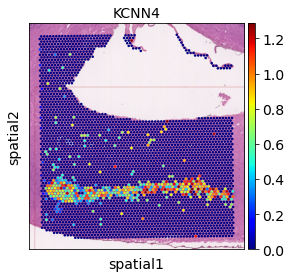

In [33]:
sc.pl.spatial(holder[2], color=["KCNN4"], cmap = 'jet', use_raw = False, # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.7', size = 1.2,
             save = '_isthmus_KCNN4')

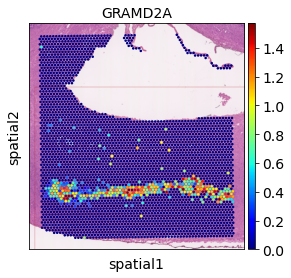

In [34]:
sc.pl.spatial(holder[2], color=["GRAMD2A"], cmap = 'jet', use_raw = False, # limit color scale at 99.2% quantile of cell abundance
                  vmin=0, vmax='p99.7', size = 1.2,
             save = '_isthmus_GRAMD2A')

In [ ]:
sc.pl.spatial(holder[2],
             save = '_isthmus_h&e')

In [ ]:
sc.pl.spatial(holder[2], color="histology_annots", palette = ['gold', 'darkorange', 'forestgreen'], 
             save = '_isthmus_hist')

In [ ]:
holder[2].raw.X[20:25, 20:25].toarray()

In [24]:
import anndata
holder[0] = anndata.AnnData(X = holder[0].raw.X, var = holder[0].raw.var, obs = holder[0].obs)
holder[1] = anndata.AnnData(X = holder[1].raw.X, var = holder[1].raw.var, obs = holder[1].obs)
holder[2] = anndata.AnnData(X = holder[2].raw.X, var = holder[2].raw.var, obs = holder[2].obs)

In [25]:
adata_raw = holder[0].concatenate(holder[1:], join='outer', index_unique=None)
adata_raw.X = adata_raw.X.tocsr()
adata_raw

/opt/conda/envs/atac_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/opt/conda/envs/atac_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/opt/conda/envs/atac_env/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) co

AnnData object with n_obs × n_vars = 12400 × 37082
    obs: 'in_tissue', 'array_row', 'array_col', 'y', 'x', 'histology_annots', 'histology_annots_number', 'L2_dist_histology_annots_Epithelium', 'L2_dist_histology_annots_Mesenchyme', 'sample', 'L2_dist_histology_annots_SmoothMuscle', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [26]:
for col in meta.columns:
    adata_raw.obs[col] = adata_raw.obs['sample'].map(meta[col].to_dict())

In [27]:
adata_raw.obs['histology_annots'].value_counts(dropna = False)

Epithelium      6596
SmoothMuscle    3773
Mesenchyme      1838
NaN              193
Name: histology_annots, dtype: int64

In [28]:
adata_raw.obs['histology_annots'] = adata_raw.obs['histology_annots'].astype(str)

In [29]:
adata_raw.obs['histology_annots'].value_counts(dropna = False)

Epithelium      6596
SmoothMuscle    3773
Mesenchyme      1838
nan              193
Name: histology_annots, dtype: int64

In [30]:
adata_raw = adata_raw[[i not in ['Background', 'nan'] for i in adata_raw.obs['histology_annots']]]

In [31]:
adata_raw.obs['histology_annots'].value_counts(dropna = False)

Epithelium      6596
SmoothMuscle    3773
Mesenchyme      1838
Name: histology_annots, dtype: int64

In [32]:
adata = adata_raw.copy()

In [33]:
adata

AnnData object with n_obs × n_vars = 12207 × 37082
    obs: 'in_tissue', 'array_row', 'array_col', 'y', 'x', 'histology_annots', 'histology_annots_number', 'L2_dist_histology_annots_Epithelium', 'L2_dist_histology_annots_Mesenchyme', 'sample', 'L2_dist_histology_annots_SmoothMuscle', 'batch', 'sangerID', 'slide', 'position', 'donor', 'stage(pcw)', 'sex', 'sectioning', 'permeabilisation(min)', 'month_processing', 'spaceranger'
    var: 'gene_ids', 'feature_types', 'genome'

In [34]:
adata.obs['sample'].value_counts()

HCA_F_RepTsp13902019    4836
HCA_F_RepTsp13902017    3938
HCA_F_RepTsp13902020    3433
Name: sample, dtype: int64

In [35]:
adata.X[30:40,30:40].toarray()

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 3.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 6.,  0., 15.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  6.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 4.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [36]:
sc.pp.filter_genes(adata, min_cells=10)

In [37]:
adata.shape

(12207, 16293)

In [38]:
adata.raw = adata.copy()

In [39]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

In [40]:
sc.pp.highly_variable_genes(adata, flavor="seurat", batch_key = "sample", n_top_genes=3000)

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:475: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:475: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:475: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:510: SettingWithCopyWarning: 
A v

In [41]:
adata.shape

(12207, 16293)

In [42]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)

In [43]:
sc.tl.umap(adata)

In [44]:
sc.tl.leiden(adata, resolution = 0.6)

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


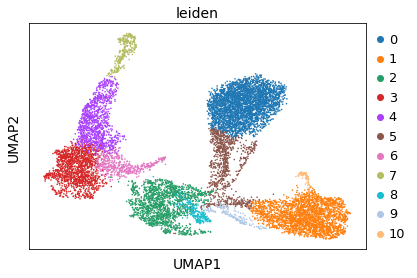

In [45]:
sc.pl.umap(adata, color = 'leiden')

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


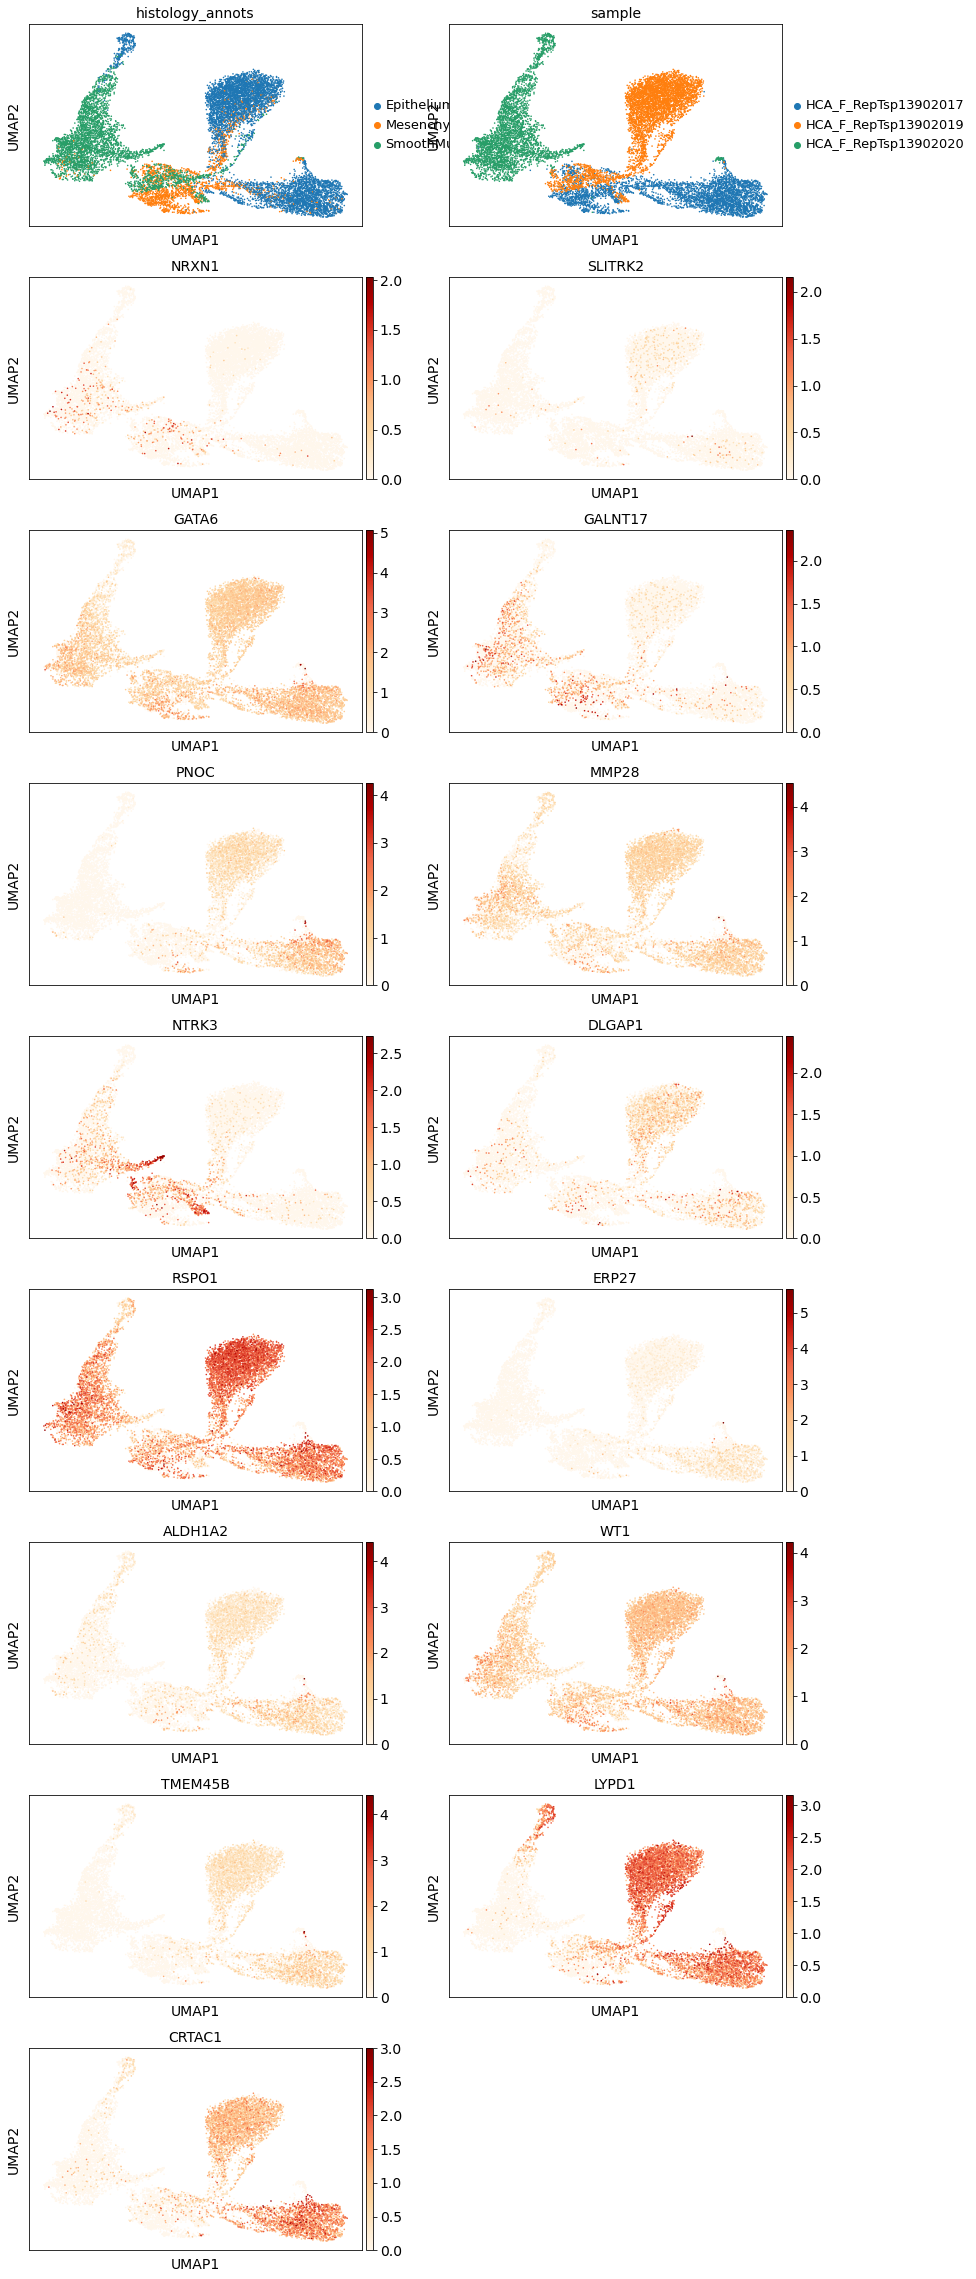

In [46]:
sc.pl.umap(adata, color = [ 'histology_annots', 'sample','NRXN1', 'SLITRK2', 
                           'GATA6','GALNT17','PNOC',  'MMP28','NTRK3',  'DLGAP1', 'RSPO1', 
                           'ERP27','ALDH1A2',
    'WT1', 
    'TMEM45B', 'LYPD1', 'CRTAC1',], 
          color_map = 'OrRd', use_raw = False, ncols = 2)

In [47]:
adata.obs['histology_annots'].value_counts()

Epithelium      6596
SmoothMuscle    3773
Mesenchyme      1838
Name: histology_annots, dtype: int64

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


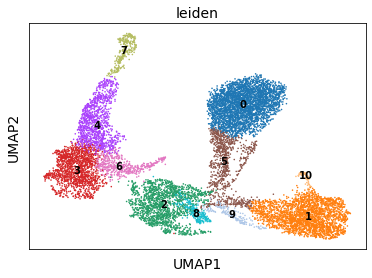

In [48]:
sc.pl.umap(adata, color = 'leiden', legend_loc = 'on data')

In [49]:
adata = adata[[i in ['7', '0', '1'] for i in adata.obs['leiden']]]

In [50]:
adata = adata[[i == 'Epithelium' for i in adata.obs['histology_annots']]]

In [51]:
adata.shape

(5862, 16293)

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


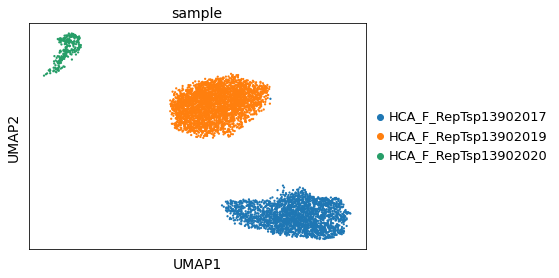

In [52]:
sc.pl.umap(adata, color = 'sample')

### Epithelium only

In [53]:
adata = anndata.AnnData(X = adata.raw.X, obs = adata.obs, var = adata.raw.var)
adata.shape

(5862, 16293)

In [54]:
sc.pp.filter_genes(adata, min_cells=10)

In [55]:
adata.shape

(5862, 15811)

In [56]:
adata.raw = adata.copy()

In [57]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

In [58]:
sc.pp.highly_variable_genes(adata, flavor="seurat", batch_key = "sample", n_top_genes=3000)

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:475: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:475: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:475: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:510: SettingWithCopyWarning: 
A v

In [59]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)

In [60]:
sc.tl.umap(adata)

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


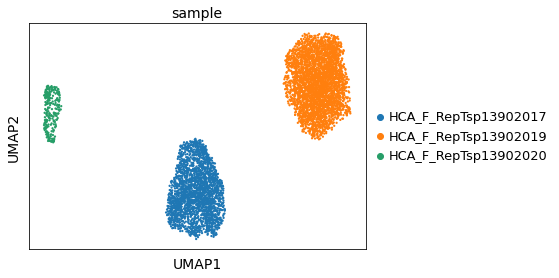

In [61]:
sc.pl.umap(adata, color = 'sample')

In [62]:
anat = {'HCA_F_RepTsp13902017' : 'fimbria', 'HCA_F_RepTsp13902019' : 'ampulla', 
       'HCA_F_RepTsp13902020' : 'isthmus'}
adata.obs['anatomy'] = adata.obs['sample'].map(anat)

In [63]:
adata.obs['anatomy'] = adata.obs['anatomy'].astype('category')
adata.obs['anatomy'] = adata.obs['anatomy'].cat.reorder_categories(['fimbria', 
                                                                   'ampulla', 'isthmus'])

In [64]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=150, 
                         frameon=True, vector_friendly=True, fontsize=14, figsize=[5,5], color_map=None, 
                         format='pdf', facecolor=None, transparent=False,)
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


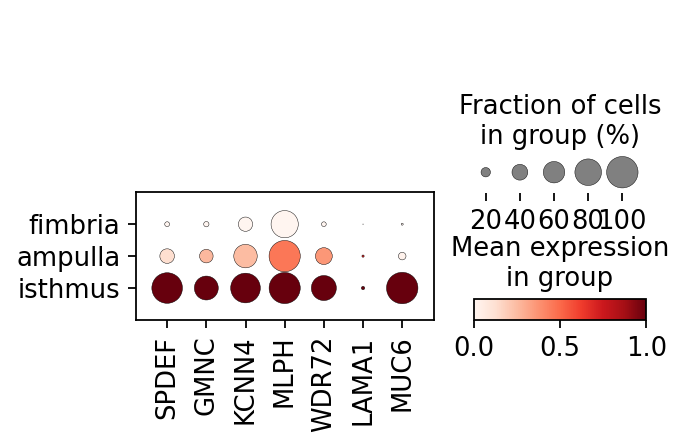

In [67]:
sc.pl.dotplot(
    adata,
    var_names =[
       'SPDEF', 'GMNC', 'KCNN4', 'MLPH', 'WDR72',  'LAMA1',
       'MUC6'
             ], groupby = 'anatomy', standard_scale = 'var',
     use_raw = False, save = '_adult_increasing_epi_FT.pdf'
)

In [ ]:
sc.pl.dotplot(
    adata,
    var_names =[
      'PNOC','GATA6', 'RSPO1',  'CRTAC1', 'WT1', 'DLGAP1', 'LYPD1', 'CD109', 'DOK5', 'TTYH1', 'PPP2R2B',  'ALDH1A2', 'MMP28', 
        'APOA1',
        'ERP27'
             ], groupby = 'anatomy', standard_scale = 'var',
     use_raw = False, save = '_adult_decreasing_epi_FT.pdf'
)

In [ ]:
sc.pl.umap(adata, color = [
       'NRXN1', 'SLITRK2',   'GATA6','GALNT17','PNOC',  'MMP28','NTRK3',  'DLGAP1', 'RSPO1',  'ERP27','ALDH1A2',
    'WT1', 
    'TMEM45B', 'LYPD1', 'CRTAC1','PTPRT',    'S100A1', 
         
        
      'MUC6', 'KCNN4', 'PADI2', 'RNF43', 'EYA2', 'WDR72',  'GRAMD2A', 'CCDC170', 'RND3', 'TACC2', 'STK33', 'ADGB', 
    'CCN2', 'AFAP1L2', 'TTYH1', 'PTGS1', 'CD109'
             ], use_raw = False, color_map = 'OrRd')

## Summarise gene set with a signature score -- decreasing signature

In [68]:
adata.X[20:25, 20:25].toarray()

array([[2.3827493 , 0.5041896 , 0.8378043 , 2.253748  , 1.4535362 ],
       [2.5222902 , 1.2658262 , 0.        , 2.5222902 , 0.        ],
       [1.602948  , 1.938955  , 0.        , 1.602948  , 0.68909585],
       [2.956151  , 0.8762324 , 0.        , 2.0805867 , 0.        ],
       [2.2524686 , 1.4331051 , 0.        , 2.2524686 , 1.4331051 ]],
      dtype=float32)

In [91]:
decreasing_signature = [ 'EDN2', 'CRB2', 'ERP27', 'PNOC',  'PPP2R2B', 'MMP28','RSPO1', 'IMPG2', 
       'APOA1', 'SLC26A7','SLITRK2','RASGEF1B', 'NUAK2', 'SERPINI2', 'ZBED2', 'RBP4',
      'EYA4', 'DOK5', 'ASS1', 
         ]
len(decreasing_signature)

19

In [92]:
sc.tl.score_genes(adata, gene_list = decreasing_signature, ctrl_size=50, 
                  gene_pool=None, n_bins=25, score_name='ft_decreasing_score', 
                  random_state=0, copy=False, use_raw=None)

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


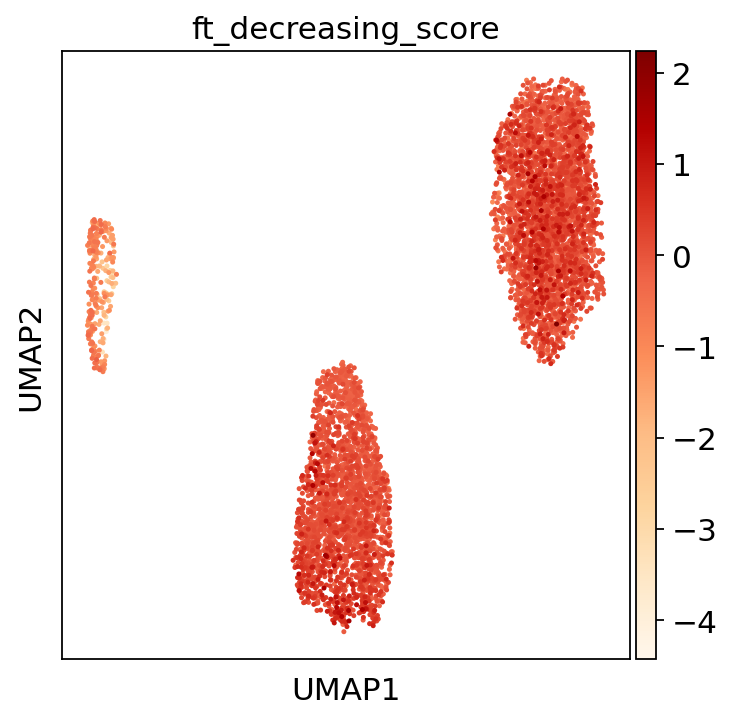

In [93]:
sc.pl.umap(adata, color = 'ft_decreasing_score', color_map = 'OrRd')

In [94]:
adata

AnnData object with n_obs × n_vars = 5862 × 15811
    obs: 'in_tissue', 'array_row', 'array_col', 'y', 'x', 'histology_annots', 'histology_annots_number', 'L2_dist_histology_annots_Epithelium', 'L2_dist_histology_annots_Mesenchyme', 'sample', 'L2_dist_histology_annots_SmoothMuscle', 'batch', 'sangerID', 'slide', 'position', 'donor', 'stage(pcw)', 'sex', 'sectioning', 'permeabilisation(min)', 'month_processing', 'spaceranger', 'leiden', 'anatomy', 'ft_decreasing_score', 'ft_increasing_score', 'anatomy_order'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'sample_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

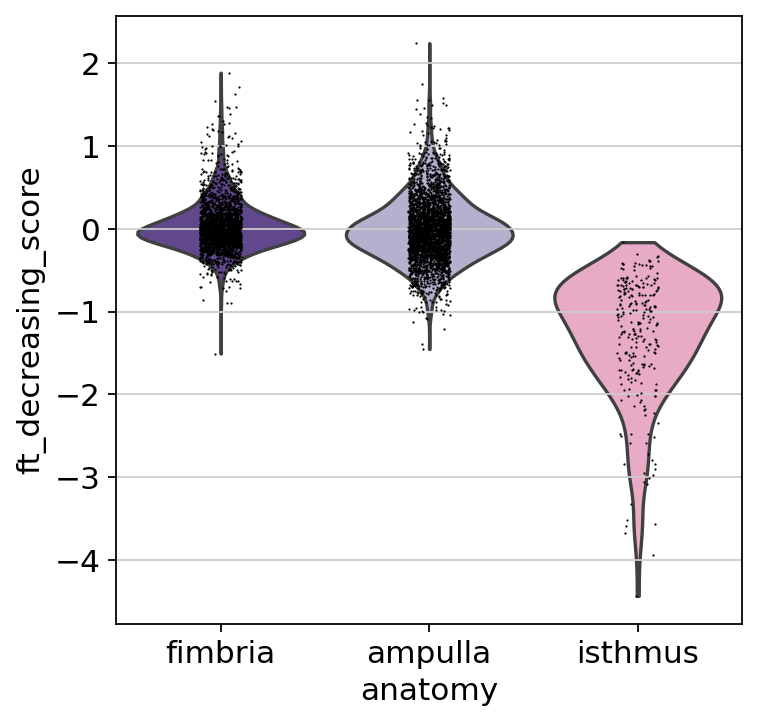

In [95]:
sc.pl.violin(adata, keys = ['ft_decreasing_score'], groupby = 'anatomy', palette = ['#5e3c99', 
                                                                                   '#b2abd2', '#f1a1c5'],
            save = '_ft_decreasing_score.pdf')

In [96]:
increasing_signature = [ 'SPDEF', 'GMNC', 'KCNN4', 'MLPH', 'WDR72',  'LAMA1',
       'MUC6'
         ]
len(increasing_signature)

7

In [97]:
sc.tl.score_genes(adata, gene_list = increasing_signature, ctrl_size=50, 
                  gene_pool=None, n_bins=25, score_name='ft_increasing_score', 
                  random_state=0, copy=False, use_raw=None)

/opt/conda/envs/atac_env/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


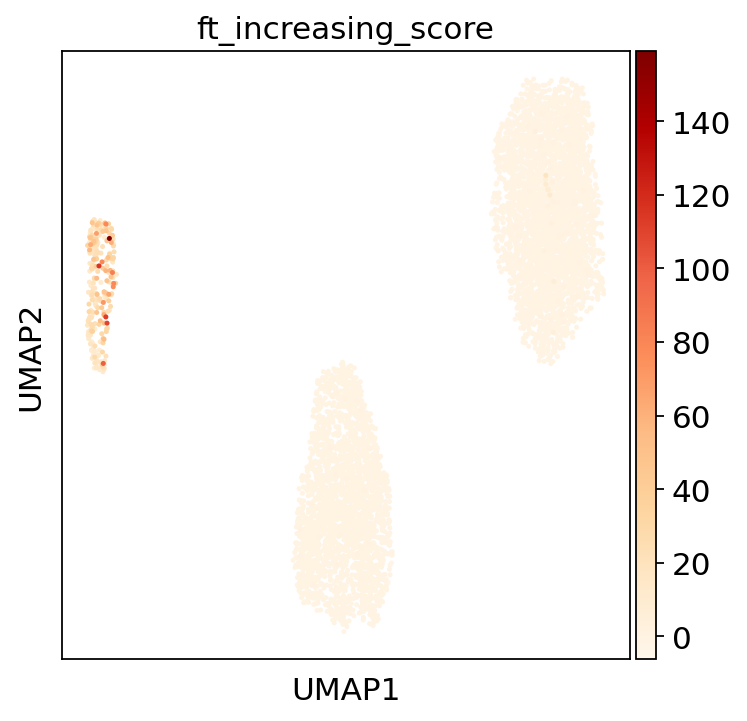

In [98]:
sc.pl.umap(adata, color = 'ft_increasing_score', color_map = 'OrRd')

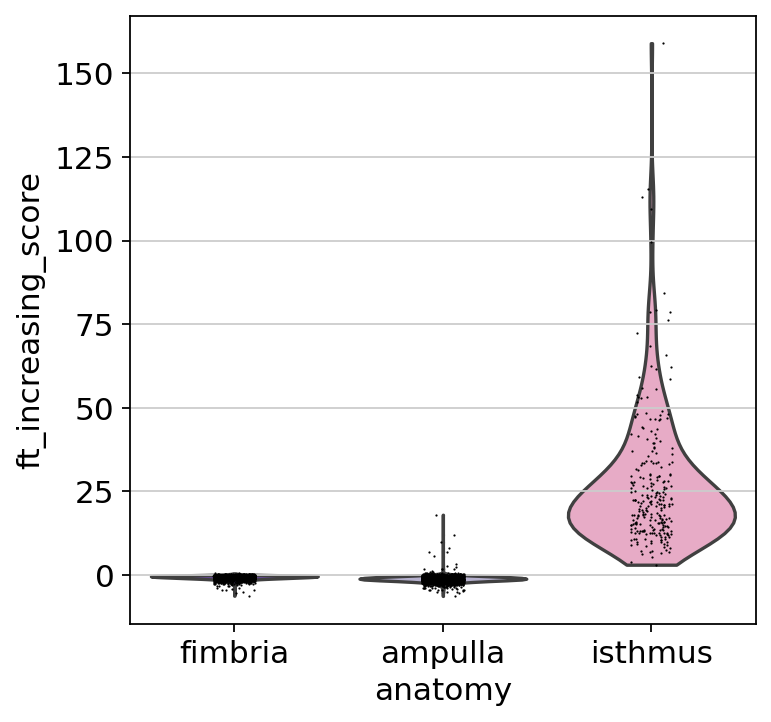

In [99]:
sc.pl.violin(adata, keys = ['ft_increasing_score'], groupby = 'anatomy', palette = ['#5e3c99', 
                                                                                   '#b2abd2', '#f1a1c5'],
            save = '_ft_increasing_score.pdf')

## Test if the signature shows a decreasing pattern from fimbria --> ampulla --> isthmus

In [100]:
order = {'fimbria' : '1', 'ampulla' : '2', 'isthmus' : '3'}

In [101]:
adata.obs['anatomy_order'] = adata.obs['anatomy'].map(order)

In [102]:
adata.obs['anatomy_order']

HCA_F_RepTsp13902017_AACACTTGGCAAGGAA-1    1
HCA_F_RepTsp13902017_AACAGGATTCATAGTT-1    1
HCA_F_RepTsp13902017_AACAGGTTATTGCACC-1    1
HCA_F_RepTsp13902017_AACAGTCAGGCTCCGC-1    1
HCA_F_RepTsp13902017_AACATAGTCTATCTAC-1    1
                                          ..
HCA_F_RepTsp13902020_TGGTGCGAACGTGGCG-1    3
HCA_F_RepTsp13902020_TGTAATTGTATCCTCG-1    3
HCA_F_RepTsp13902020_TGTATCGGCGGTCGCA-1    3
HCA_F_RepTsp13902020_TGTCTGTAAGCGAACT-1    3
HCA_F_RepTsp13902020_TGTTCACTCACGGTAA-1    3
Name: anatomy_order, Length: 5862, dtype: category
Categories (3, object): ['1', '2', '3']

In [103]:
df = adata.obs[['ft_decreasing_score', 'ft_increasing_score', 'anatomy_order']]

In [104]:
df.head()

ft_decreasing_score  \
HCA_F_RepTsp13902017_AACACTTGGCAAGGAA-1            -0.089080   
HCA_F_RepTsp13902017_AACAGGATTCATAGTT-1            -0.150718   
HCA_F_RepTsp13902017_AACAGGTTATTGCACC-1             1.621236   
HCA_F_RepTsp13902017_AACAGTCAGGCTCCGC-1             0.414861   
HCA_F_RepTsp13902017_AACATAGTCTATCTAC-1            -0.082466   

                                         ft_increasing_score anatomy_order  
HCA_F_RepTsp13902017_AACACTTGGCAAGGAA-1            -0.234114             1  
HCA_F_RepTsp13902017_AACAGGATTCATAGTT-1            -1.402293             1  
HCA_F_RepTsp13902017_AACAGGTTATTGCACC-1            -1.313426             1  
HCA_F_RepTsp13902017_AACAGTCAGGCTCCGC-1            -1.904921             1  
HCA_F_RepTsp13902017_AACATAGTCTATCTAC-1            -0.849498             1

In [83]:
import rpy2.rinterface_lib.callbacks
import logging
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)
import anndata2ri
anndata2ri.activate()
%load_ext rpy2.ipython

In [84]:
# %%R 
# install.packages("clinfun")

In [85]:
%%R 
library(clinfun)

In [105]:
%%R -i df
# Convert the vector to a factor
factor_groups <- factor(df$anatomy_order, ordered = TRUE, 
                                levels = c("1", "2", "3"))
values <- df$ft_decreasing_score

/opt/conda/envs/atac_env/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


In [106]:
%%R 
# Perform Jonckheere's trend test
result <- jonckheere.test(values, factor_groups, alternative = c("decreasing"), nperm=2000)
print(result)


	Jonckheere-Terpstra test

data:  
JT = 3546548, p-value = 5e-04
alternative hypothesis: decreasing



In [107]:
%%R -i df
# Convert the vector to a factor
factor_groups <- factor(df$anatomy_order, ordered = TRUE, 
                                levels = c("3", "2", "1"))
values <- df$ft_increasing_score

/opt/conda/envs/atac_env/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:55: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


In [108]:
%%R 
# Perform Jonckheere's trend test
result <- jonckheere.test(values, factor_groups, alternative = c("increasing"), nperm=2000)
print(result)


	Jonckheere-Terpstra test

data:  
JT = 5546117, p-value = 5e-04
alternative hypothesis: increasing

